# HW4 

# Setup

In [ ]:
import random
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import torch.nn as nn
import torch.optim as optim
from sklearn import linear_model
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
import itertools



# Question 3

In [ ]:

def synthetic_data(w, b, n):
    X = torch.normal(0, 1, (n, len(w)))
    linear_combination = torch.matmul(X, w) + b

    y = (linear_combination > 0).float()
    return X, y.reshape((-1, 1))


In [ ]:

w_str = torch.tensor([2.0, -3.4])
b_str = 4.2

features, labels = synthetic_data(w_str, b_str, 1000)


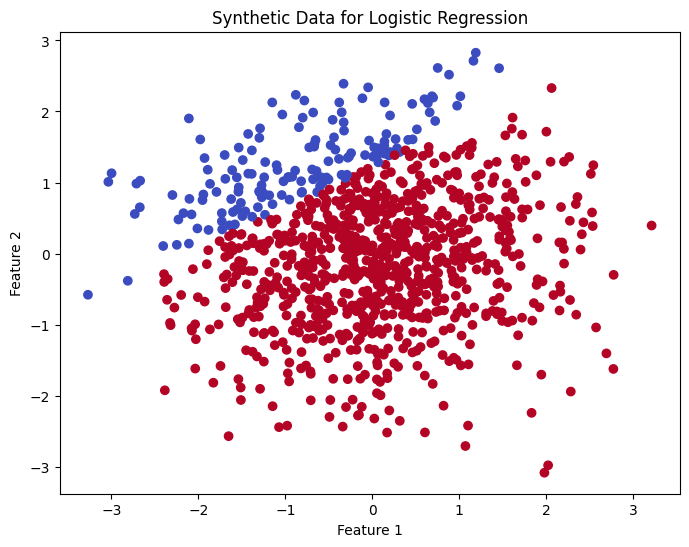

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(features[:, 0], features[:, 1], c=labels.flatten(), cmap='coolwarm', marker='o')
plt.title("Synthetic Data for Logistic Regression")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [ ]:

def data_iter(batch_size, features, labels):
    n = len(features)
    idx = list(range(n))
    random.shuffle(idx)
    for i in range(0, n, batch_size):
        batch_idx = torch.tensor(idx[i:min(batch_size + i, n)])
        yield features[batch_idx], labels[batch_idx]


## Logistic regression model using PyTorch

In [ ]:

def logistic_regression(X, w, b):
    return torch.sigmoid(torch.matmul(X, w) + b)

def binary_cross_entropy_loss(y_hat, y):
    epsilon = 1e-5  # To avoid log(0) errors
    return -(y * torch.log(y_hat + epsilon) + (1 - y) * torch.log(1 - y_hat + epsilon)).mean()

# Initialize weight and bias parameters
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# Define optimization algorithm
trainer = torch.optim.SGD([w, b], lr=0.03)

# Main training loop
epochs = 50
batch_size = 10

for epoch in range(epochs):
    for X, y in data_iter(batch_size, features, labels):
        trainer.zero_grad()
        y_hat = logistic_regression(X, w, b)
        train_loss = binary_cross_entropy_loss(y_hat, y)
        train_loss.backward()
        trainer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch + 1}, Loss: {train_loss.item():.4f}')

# Weight and bias after training
print('Estimated weights:', w.detach().numpy().flatten())
print('Estimated bias:', b.item())


Epoch 10, Loss: 0.1788
Epoch 20, Loss: 0.1083
Epoch 30, Loss: 0.1480
Epoch 40, Loss: 0.1260
Epoch 50, Loss: 0.0694
Estimated weights: [ 2.0475056 -3.5381937]
Estimated bias: 4.528244972229004


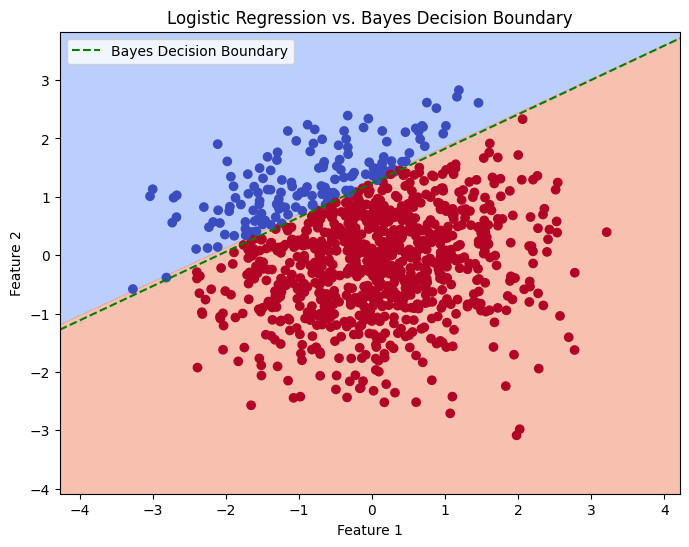

In [ ]:

x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
probs = logistic_regression(grid, w, b).detach().numpy().reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], cmap="coolwarm", alpha=0.6)
plt.scatter(features[:, 0], features[:, 1], c=labels.flatten(), cmap='coolwarm', marker='o')

# Bayes decision boundary
x_vals = np.linspace(x_min, x_max, 100)
bayes_boundary = -(w_str[0] / w_str[1]) * x_vals - (b_str / w_str[1])

plt.plot(x_vals, bayes_boundary, color='green', linestyle='--', label='Bayes Decision Boundary')

plt.title('Logistic Regression vs. Bayes Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()



# Question 4

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Weekly.csv'

weekly = pd.read_csv(file_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### a.

   Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down
2  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up
3  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up
4  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up
Summary Statistics:
               Year         Lag1         Lag2         Lag3         Lag4  \
count  1089.000000  1089.000000  1089.000000  1089.000000  1089.000000   
mean   2000.048669     0.150585     0.151079     0.147205     0.145818   
std       6.033182     2.357013     2.357254     2.360502     2.360279   
min    1990.000000   -18.195000   -18.195000   -18.195000   -18.195000   
25%    1995.000000    -1.154000    -1.154000    -1.158000    -1.158000   
50%    2000.000000     0.241000     0.241000     0.241000     0.238000   
75%    2005.000000     1.405000     1.409

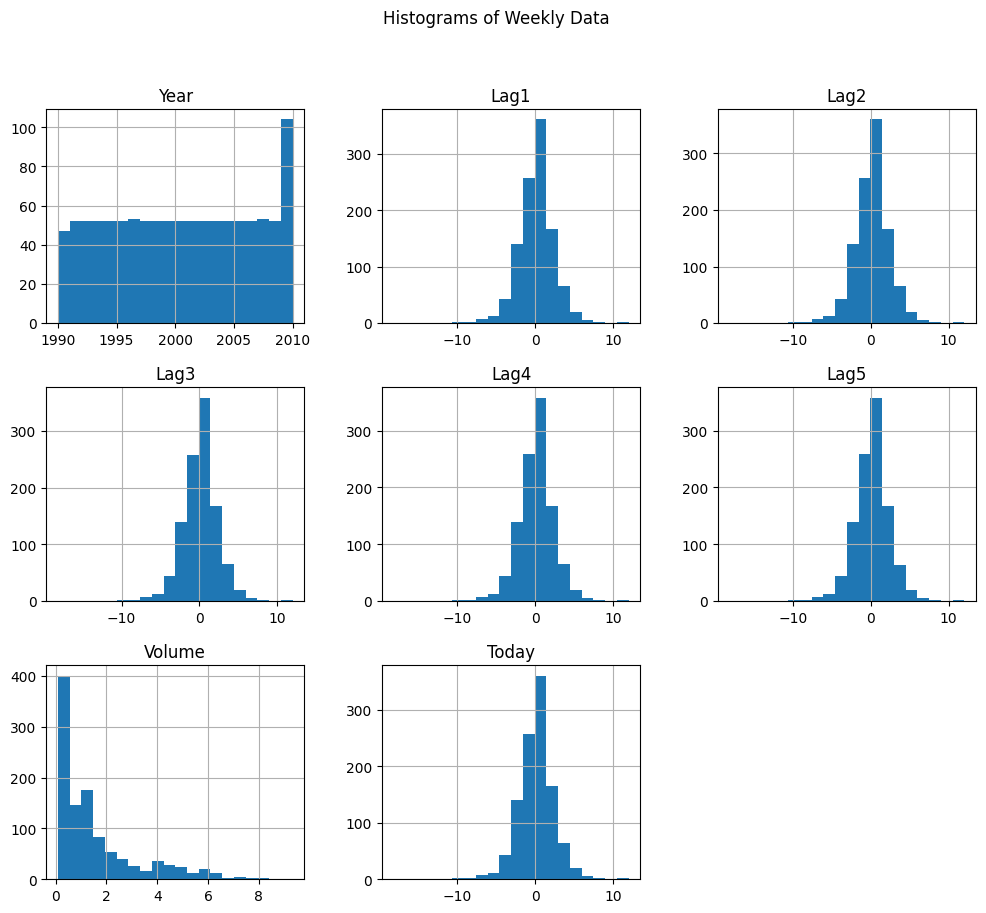

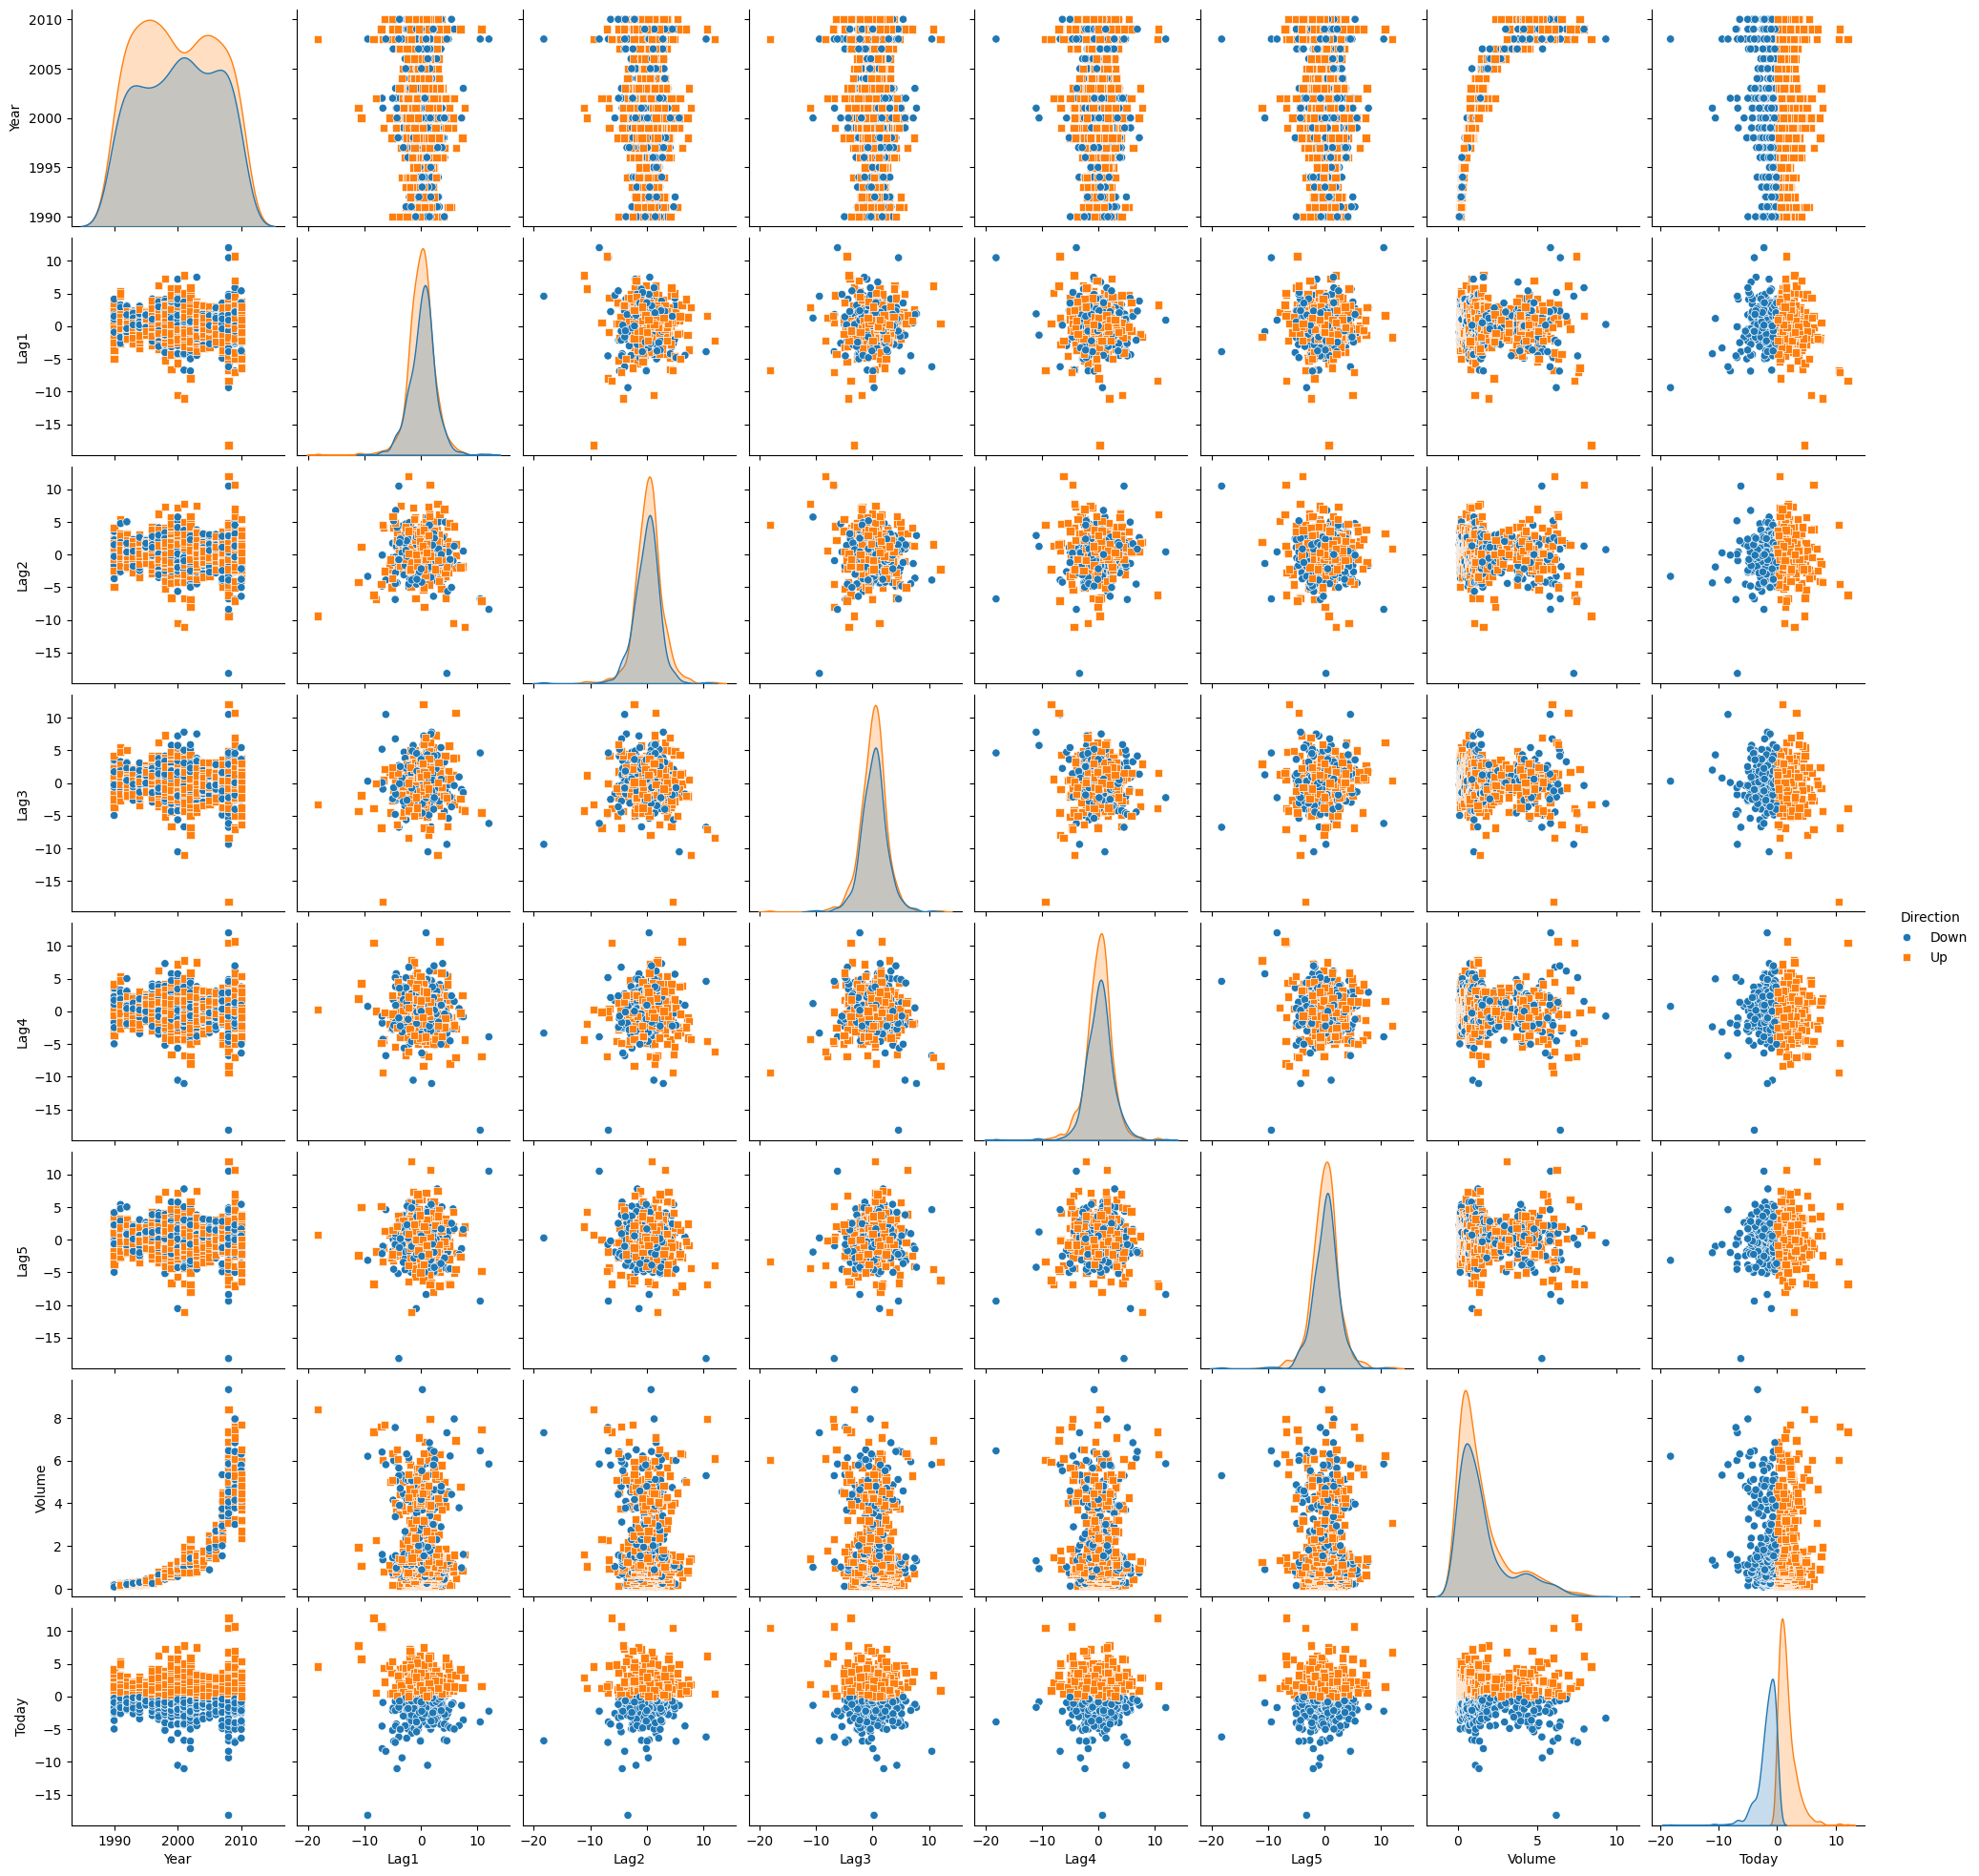

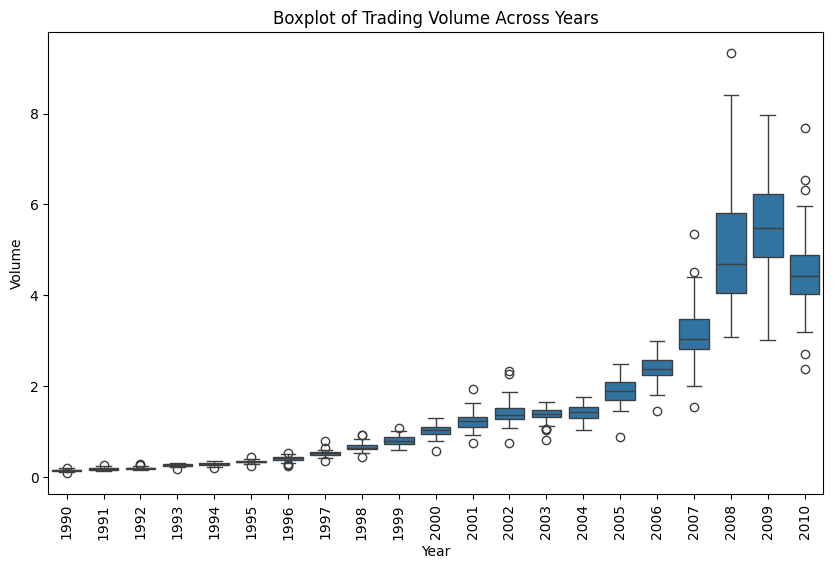

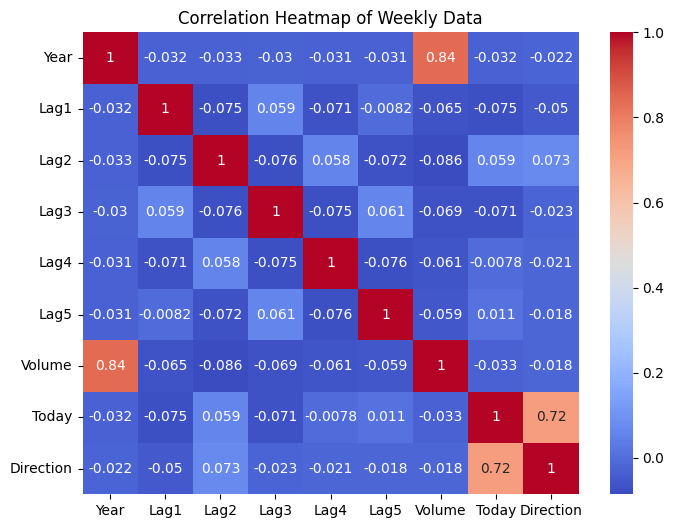

In [ ]:

print(weekly.head())

summary_stats = weekly.describe()
print("Summary Statistics:\n", summary_stats)

print("Missing Values:\n", weekly.isnull().sum())

weekly.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Weekly Data')
plt.show()

sns.pairplot(weekly, hue="Direction", diag_kind='kde', markers=["o", "s"])
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Volume', data=weekly)
plt.title('Boxplot of Trading Volume Across Years')
plt.xticks(rotation=90)
plt.show()

# Convert 'Direction' column to numerical values
weekly['Direction'] = weekly['Direction'].map({'Up': 1, 'Down': 0})

plt.figure(figsize=(8, 6))
numeric_weekly = weekly.select_dtypes(include=np.number)
sns.heatmap(weekly.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Weekly Data')
plt.show()


### b.



In [ ]:

X = weekly[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]

X = sm.add_constant(X)

y = weekly['Direction']

logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())


Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Mon, 23 Sep 2024   Pseudo R-squ.:                0.006580
Time:                        20:53:14   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

### c.

In [ ]:

y_pred_prob = result.predict(X)

y_pred_class = (y_pred_prob >= 0.5).astype(int)

cm = confusion_matrix(y, y_pred_class)
print("Confusion Matrix:\n", cm)

accuracy = accuracy_score(y, y_pred_class)
print(f"Overall Accuracy: {accuracy:.4f}")


Confusion Matrix:
 [[ 54 430]
 [ 48 557]]
Overall Accuracy: 0.5611


### d.

In [ ]:

train_data = weekly[weekly['Year'] <= 2008]
test_data = weekly[weekly['Year'] > 2008]

X_train = train_data[['Lag2']]
y_train = train_data['Direction']

X_test = test_data[['Lag2']]
y_test = test_data['Direction']

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

print(result.summary())

y_pred_prob = result.predict(X_test)

y_pred_class = (y_pred_prob >= 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix:\n", cm)

accuracy = accuracy_score(y_test, y_pred_class)
print(f"Overall Accuracy on Test Data: {accuracy:.4f}")


Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Mon, 23 Sep 2024   Pseudo R-squ.:                0.003076
Time:                        20:53:53   Log-Likelihood:                -675.27
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.04123
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2033      0.064      3.162      0.002       0.077       0.329
Lag2           0.0581      0.

### e.

In [ ]:

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

y_pred_class = lda_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix:\n", cm)

accuracy = accuracy_score(y_test, y_pred_class)
print(f"Overall Accuracy on Test Data: {accuracy:.4f}")


Confusion Matrix:
 [[ 9 34]
 [ 5 56]]
Overall Accuracy on Test Data: 0.6250


### f.

In [ ]:

train_data = weekly[weekly['Year'] <= 2008]
test_data = weekly[weekly['Year'] > 2008]

X_train = train_data[['Lag2']]
y_train = train_data['Direction']

X_test = test_data[['Lag2']]
y_test = test_data['Direction']

qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

y_pred_class = qda_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix:\n", cm)

accuracy = accuracy_score(y_test, y_pred_class)
print(f"Overall Accuracy on Test Data: {accuracy:.4f}")


Confusion Matrix:
 [[ 0 43]
 [ 0 61]]
Overall Accuracy on Test Data: 0.5865


### g.

In [ ]:

knn_model = KNeighborsClassifier(n_neighbors=1)

knn_model.fit(X_train, y_train)

y_pred_class = knn_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix:\n", cm)

accuracy = accuracy_score(y_test, y_pred_class)
print(f"Overall Accuracy on Test Data: {accuracy:.4f}")


Confusion Matrix:
 [[22 21]
 [32 29]]
Overall Accuracy on Test Data: 0.4904


### h.

In [ ]:

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred_class = nb_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix:\n", cm)

accuracy = accuracy_score(y_test, y_pred_class)
print(f"Overall Accuracy on Test Data: {accuracy:.4f}")


Confusion Matrix:
 [[ 0 43]
 [ 0 61]]
Overall Accuracy on Test Data: 0.5865


### j.

In [ ]:

train_data = weekly[weekly['Year'] <= 2008]
test_data = weekly[weekly['Year'] > 2008]

all_predictors = ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']

def evaluate_model(model, X_train, X_test, y_train, y_test, name="Model"):
    model.fit(X_train, y_train)
    y_pred_class = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred_class)
    accuracy = accuracy_score(y_test, y_pred_class)
    print(f"\n{name}")
    print("Confusion Matrix:\n", cm)
    print(f"Overall Accuracy on Test Data: {accuracy:.4f}")
    return accuracy

# Try different combinations of predictors
def test_combinations(predictors):
    X_train = train_data[predictors]
    y_train = train_data['Direction']
    X_test = test_data[predictors]
    y_test = test_data['Direction']

    print(f"Testing with predictors: {predictors}")

    # Logistic Regression
    log_reg = LogisticRegression(max_iter=1000)
    log_reg_acc = evaluate_model(log_reg, X_train, X_test, y_train, y_test, name="Logistic Regression")

    # LDA
    lda = LinearDiscriminantAnalysis()
    lda_acc = evaluate_model(lda, X_train, X_test, y_train, y_test, name="LDA")

    # QDA
    qda = QuadraticDiscriminantAnalysis()
    qda_acc = evaluate_model(qda, X_train, X_test, y_train, y_test, name="QDA")

    for k in [1, 3, 5, 7, 9]:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn_acc = evaluate_model(knn, X_train, X_test, y_train, y_test, name=f"KNN with K={k}")

    return {'predictors': predictors, 'log_reg_acc': log_reg_acc, 'lda_acc': lda_acc, 'qda_acc': qda_acc, 'knn_acc': knn_acc}

def generate_combinations():
    best_models = []
    for r in range(1, len(all_predictors) + 1):
        for subset in itertools.combinations(all_predictors, r):
            result = test_combinations(list(subset))
            best_models.append(result)
    return best_models

best_results = generate_combinations()

best_model = max(best_results, key=lambda x: max(x['log_reg_acc'], x['lda_acc'], x['qda_acc'], x['knn_acc']))
print("\nBest model based on accuracy:")
print(best_model)


Testing with predictors: ['Lag1']

Logistic Regression
Confusion Matrix:
 [[ 4 39]
 [ 6 55]]
Overall Accuracy on Test Data: 0.5673

LDA
Confusion Matrix:
 [[ 4 39]
 [ 6 55]]
Overall Accuracy on Test Data: 0.5673

QDA
Confusion Matrix:
 [[ 0 43]
 [ 0 61]]
Overall Accuracy on Test Data: 0.5865

KNN with K=1
Confusion Matrix:
 [[18 25]
 [32 29]]
Overall Accuracy on Test Data: 0.4519

KNN with K=3
Confusion Matrix:
 [[14 29]
 [30 31]]
Overall Accuracy on Test Data: 0.4327

KNN with K=5
Confusion Matrix:
 [[15 28]
 [27 34]]
Overall Accuracy on Test Data: 0.4712

KNN with K=7
Confusion Matrix:
 [[10 33]
 [22 39]]
Overall Accuracy on Test Data: 0.4712

KNN with K=9
Confusion Matrix:
 [[14 29]
 [20 41]]
Overall Accuracy on Test Data: 0.5288
Testing with predictors: ['Lag2']

Logistic Regression
Confusion Matrix:
 [[ 9 34]
 [ 5 56]]
Overall Accuracy on Test Data: 0.6250

LDA
Confusion Matrix:
 [[ 9 34]
 [ 5 56]]
Overall Accuracy on Test Data: 0.6250

QDA
Confusion Matrix:
 [[ 0 43]
 [ 0 61]]
Ov